In [1]:
#importing basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from collections import defaultdict
from time import time

import pickle

%matplotlib inline
np.random.seed(100)


In [2]:
# Importing Decision Tree
from sklearn.ensemble import RandomForestClassifier


#For tuning the hyper-parameters

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#importing metrics

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [3]:
#unpickling
# UnPickling data

with open('F:\Syed Issam Bukhari\Diabetes Detection\Pickles\X_train.pickle','rb') as data:
    X_train= pickle.load(data)

with open('F:\Syed Issam Bukhari\Diabetes Detection\Pickles\X_test.pickle','rb') as data:
    X_test=pickle.load(data)
    

with open('F:\Syed Issam Bukhari\Diabetes Detection\Pickles\Y_train.pickle','rb') as data:
    Y_train=pickle.load(data)

with open('F:\Syed Issam Bukhari\Diabetes Detection\Pickles\Y_test.pickle','rb') as data:
    Y_test=pickle.load(data)
    
#unpickling df_model
with open('F:\Syed Issam Bukhari\Diabetes Detection\Pickles\df_model.pickle','rb') as data:
    df_model=pickle.load(data)

In [4]:
base_model=RandomForestClassifier()

In [5]:
base_model.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [6]:
print("The training score is ")
base_model.score(X_test,Y_test)*100

The training score is 


77.95275590551181

In [7]:
print("The test score is")
base_model.score(X_train,Y_train)*100

The test score is


100.0

## if we see the above results implies that the model is underfitting.

## Lets Tune the RandomForest

In [8]:
base_model.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>

## Using RandomizedGridSearchCV

In [9]:
# I will be selecting criterion, max_depth, max_features,min_samples_leaf,min_samples_split,bootstrap,n_estimators
# defining a range for all of these
n_estimators=[i for i in range(1,100)]
bootstrap=['True','False']
criterion=['gini','entropy']
max_depth=[int(x) for x in np.linspace(start = 1, stop = 10, num = 5)]
max_features=['sqrt','auto','log2']
min_samples_leaf=[i for i in range(1,20)]
min_samples_split=[int(x) for x in np.linspace(start = 2, stop = 40, num = 5)]
random_grid={'n_estimators':n_estimators,'bootstrap':bootstrap,'criterion':criterion, 'max_depth':max_depth, 'max_features':max_features,'min_samples_leaf':min_samples_leaf,'min_samples_split':min_samples_split}
print(random_grid)

{'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], 'bootstrap': ['True', 'False'], 'criterion': ['gini', 'entropy'], 'max_depth': [1, 3, 5, 7, 10], 'max_features': ['sqrt', 'auto', 'log2'], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'min_samples_split': [2, 11, 21, 30, 40]}


In [10]:
random_search=RandomizedSearchCV(estimator=base_model,param_distributions=random_grid,scoring='accuracy',cv=5,return_train_score=True)

In [11]:
random_search.fit(X_train,Y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [12]:
print(random_search.best_params_)
print(random_search.best_estimator_)
print(random_search.best_score_)

{'n_estimators': 67, 'min_samples_split': 11, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'entropy', 'bootstrap': 'True'}
RandomForestClassifier(bootstrap='True', ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, n_estimators=67,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
0.7845855173752669


In [56]:
#Using the gridsearchcv based on the outputs of randomsearch
n_estimators=[i for i in range(500,1000)]
bootstrap=['False']
criterion=['entropy']
max_depth=[i for i in range(1,10)]
max_features=['sqrt']
min_samples_leaf=[2,3,4]
min_samples_split=[10,11,12]
grid={'n_estimators':n_estimators,'bootstrap':bootstrap,'criterion':criterion, 'max_depth':max_depth, 'max_features':max_features,'min_samples_leaf':min_samples_leaf,'min_samples_split':min_samples_split}
print(grid)

{'n_estimators': [500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 69

In [57]:
grid_search=GridSearchCV(estimator=base_model,param_grid=grid,scoring='accuracy',cv=5)

In [58]:
grid_search.fit(X_train,Y_train)

KeyboardInterrupt: 

In [51]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap='False', ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=9, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [52]:
grid_search.best_params_

{'bootstrap': 'False',
 'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 500}

In [53]:
print(grid_search.best_score_*100)

78.0625121335663


In [54]:
# Training accuracy
print("The training accuracy is: ")
train_acc=accuracy_score(Y_train, grid_search.predict(X_train))*100
print(train_acc)

The training accuracy is: 
89.52569169960475


In [55]:
#Test Accuracy
print("The test accuracy is: ")
test_acc=accuracy_score(Y_test, grid_search.predict(X_test))*100
print(test_acc)

The test accuracy is: 
77.16535433070865


## Confusion Matrix

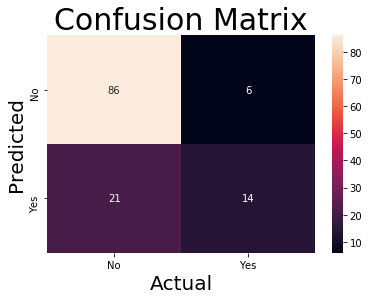

In [21]:
Conf_matrix=confusion_matrix(Y_test, grid_search.predict(X_test))
sns.heatmap(data=Conf_matrix,annot=True,yticklabels=(["No","Yes"]),xticklabels=(["No","Yes"]));
plt.xlabel("Actual",fontsize=20);
plt.ylabel("Predicted",fontsize=20);
plt.title("Confusion Matrix",fontsize=30);

## Saving decision tree accuracies into dataframe

In [22]:
df_model_current=pd.DataFrame({'Model':["Decision Tree"],'Train_Accuracy':[train_acc],'Test_Accuracy':[test_acc]},index=[1])

In [23]:
df_model=pd.concat([df_model,df_model_current],axis=0)

In [24]:
df_model

,Model,Train_Accuracy,Test_Accuracy
0,KNN,77.842692,75.661792
1,Decision Tree,77.272727,79.527559
1,Decision Tree,90.909091,78.740157


In [ ]:
# Pickling dataframe
with open('F:\Syed Issam Bukhari\Diabetes Detection\Pickles\df_model.pickle','wb') as output:
    pickle.dump(df_model, output)



#pickling DT model
with open('F:\Syed Issam Bukhari\Diabetes Detection\Pickles\RandomForest.pickle','wb') as output:
    pickle.dump(grid_search, output)